# Niutono metodas
> 1. Prilyginame $x_k = x$, $k = 0$ bei apsibrėžiame konvergavimo kriterijų $\varepsilon\equiv(\varepsilon_1, \varepsilon_2)>0$.
> 2. Apskaičiuojame funkciją $f(x_k)$ ir jos pirmąją išvestinę $f^\prime(x_k)$.  Taip gauname:  $$\delta_k = - \frac{f(x_k)}{f^\prime(x_k)}.$$
> 3. Randame $$x_{k+1} = x_k + \delta_k.$$
> 4. Jei $|x_{k+1}-x_k|<\varepsilon_1(1-|x_{k+1}|)$, tuomet einame į 5 žingsnį, kitu atveju, grėžtame į 2.
> 5. Jei $|f(x_{k+1})|<\varepsilon_2$, tuomet stabdome iteracinį metodą ir sprendinys $x^* = x_{k+1}$. Kitu atveju sprendinio neradome.

In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [30]:
def solve_newton(F,DF,x0,e,max_iter):
    xn = x0
    X_vec = x0
    for n in range(0,max_iter):
        fxn = F(xn)
        if abs(fxn) < e:
            print(f"Sprendinys rastas po {n} iteracijų.")
            return X_vec
        Dfxn = DF(xn)
        if Dfxn == 0:
            print('Išvestinė lygi 0, sprendinys nerastas.')
            return X_vec
        xn = xn - fxn/Dfxn
        X_vec = np.vstack((X_vec, xn))
    print('Pasiektas maksimalus iteracijų skaičius, sprendinys atitinkantis konvergavimo sąlygas nerastas.')
    return X_vec

In [33]:
f = lambda x: (x-1)**3 - 2
Df = lambda x: (3*x-3)**2
epsilon = 1e-8
x_vec = solve_newton(f, Df, 1.5, epsilon, 10)
print(x_vec[-1])

Pasiektas maksimalus iteracijų skaičius, sprendinys atitinkantis konvergavimo sąlygas nerastas.
[2.26199641]


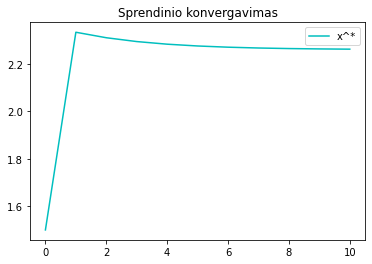

In [34]:
# Funkcijos grafikų braižymui
plt.plot(np.arange(len(x_vec)), x_vec, color='c')
plt.legend(['x^*'])
plt.title("Sprendinio konvergavimas")
plt.show()